# **Farmworkers in the United States During and After the Bracero Program**

### Kylie Miller

#### *May 15, 2025 -- Final Project for CU Denver's HIST 5261, "Working With Data"*

## Introduction

In the wake of World War II, people in the United States suddenly had an abundance of employment opportunities. With men joining the military to fight overseas and the creation of many new industrial jobs to support the war effort, the United States workforce was facing an unusual problem of not having enough workers, particularly in agriculture. The United States government found a willing partner to address this problem in the Mexican government, which was eager to boost its economy by providing work for its unemployed citizens. These simultaneous desires led to an agreement between the two nations that would become known as the Bracero Program, lasting from 1942 until its termination long after the end of World War II in 1964.

The Bracero Program, a term that comes from the Spanish word "brazo" meaning arm in reference to manual labor, was a temporary work program that would bring Mexican men to the United States under work contracts for periods between six weeks and six months before returning back to Mexico. After going through a screening and documentation process with the Mexican government, the United States would provide transportation, temporary housing, and food for the Bracero workers in addition to their temporary jobs. Other than the initial years of the program when some Braceros worked on railroads, Braceros came to work on farms in most states throughout the United States, shown in the map below.

***insert map here***

By 1964, the United States government ended the Bracero Program, partly because people in the United States worried about the impact of Braceros on domestic labor. Those pushing to end the program particularly focused on the idea that the program took away jobs from citizens in the United States and overall lowered wages of farmworkers. Over twenty years of such a program brings up questions related to the extent to which farms became dependent on Bracero labor and therefore the impact that ending the program had on farms. Specifically, **how effective was ending the Bracero program in achieving goals of supporting local labor?** This project will explore this question by looking at data related to farmworker employment between 1942 and 1974, particularly exploring changes in 1964 at the termination of the program. 

The 2018 economic study by Michael Clemens et. al where this data originated explored a similar question, concluding that "*bracero* exclusion failed to substantially raise wages or employment for domestic workers" (1485), arguing that the reason for this was an adjustment to production techniques and production levels. A 2021 study by Sam Shmuel adds to this by arguing that ending the Bracero Program "induced a sharp increase in innovation in technologies" (2), showing that instead of replacing Braceros with domestic labor, farmers adjusted through new technologies. While my project supports the idea that ending the Bracero Program did not cause a significant improvement for domestic laboer, my analysis relies less on complex economic modeling and more on data visualization. I will also incorporate further nuance in thinking about the data, considering changes that started before ending the Bracero Program as well as the role of illegal immigration, topics discussed in literature but not emphasized in these studies. 

## Methods/Data

The [dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/17M4ZP) for this project comes from the Harvard Dataverse and was created for the 2018 study "Immigration Restrictions as Active Labor Market Policy: Evidence from the Mexican Bracero Exclusion" by Michael Clemens et. al. Most data comes from the "bracero_aer_dataset", where the research team compiled a significant amount of the data from "Farm Labor Reports" from the United States Department of Agrigulture. They also used some supplemental state data reports and reports from the United States Department of Labor. ([PDFs for the sources of this data can be found by clicking here.](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DJHVHB)) As with all data, especially that collected at a large national scale, one should keep in mind various inaccuracies that could arise, including varying data collection methods over the years and relying on farm owners to accurately report their numbers. 

I also utilized the "total_braceros_by_year" dataset, which not only showed the total number of contracted Braceros between 1942 and 1980 but also the number of "apprehensions" of unauthorized Mexicans in the United States each year. This data occurs in much of the literature related to the Bracero Program, meaning it is likely easily accessible government data. As I will discuss later, while many scholars use the number of apprehensions as an indication of unauthorized immigrants in the United States, it is important to remember that this number comes from the number of unauthorized immigrants caught by government officials, numbers that would change not only with changing numbers of unauthorized immigrants but also with respect to the effort officials put into making such apprehensions.

### Selecting Useful Data

The original "bracero_aer_dataset" compiled included about 80 columns of information one could work with, including data related to crops and wages. 

In [33]:
import pandas as pd
bracero_df_og = pd.read_csv('../data/original/bracero_aer_dataset.tab', sep='\t')
bracero_df_og.columns

Index(['State', 'State_FIPS', 'Region', 'Year', 'Month', 'DailywoBoard_final',
       'HourlyComposite_final', 'MonthlyComposite_final',
       'TotalHiredSeasonal_final', 'Mexican_final',
       'HiredWorkersonFarms_final', 'Local_final', 'Intrastate_final',
       'Interstate_final', 'TotalForeign_final', 'Jamaican_final',
       'Bahamian_final', 'BWIOthers_final', 'BWI_final', 'Canadian_final',
       'CanadianOthers_final', 'PuertoRican_final', 'OtherForeign_final',
       'TotalAg_final', 'Nonlocal_final', 'Farmworkers_Total',
       'Farmworkers_Family', 'Farmworkers_Hired', 'Petroleum', 'Tractors',
       'Cotton_machine', 'Sugarbeet_machine', 'Sugarbeet_monogerm',
       'SugarBeets', 'Cotton', 'Tomatoes_total', 'Lettuce',
       'Strawberries_total', 'Citrus', 'Cantaloupes', 'BrusselsSprouts',
       'Asparagus_total', 'Celery', 'Cucumbers_pickle', 'Tomatoes_fresh',
       'Tomatoes_proc', 'Strawberries_fresh', 'Strawberries_proc',
       'Asparagus_fresh', 'Asparagus_proc', 

Since I was only interested in the data concerning farmworker populations, I created new dataframes and csv files with only the data relevant to my project. This also required using more [details about the columns](https://dataverse.harvard.edu/dataverse-data-explorer-v2/?fileId=3240617&fileMetadataId=2524735&dvLocale=en&siteUrl=https://dataverse.harvard.edu), as it was not helpful for me to use columns of data only addressing a few years like the Jamaican_final column.

In [59]:
##Original cutting out columns
farmworkers_df_og = bracero_df_og[['State','Year','Month', 'Region', 'TotalHiredSeasonal_final','Mexican_final','HiredWorkersonFarms_final',
              'Local_final','Intrastate_final','Interstate_final','TotalForeign_final','Jamaican_final','Bahamian_final',
              'BWIOthers_final','BWI_final','Canadian_final','CanadianOthers_final','PuertoRican_final', 'TotalAg_final','Nonlocal_final','Farmworkers_Total','Farmworkers_Family','Farmworkers_Hired']]

##Renaming columns to take up less space (mainly taking out "final")
farmworkers_df_og = farmworkers_df_og.rename(columns={'TotalHiredSeasonal_final': 'TotalHiredSeasonal', 
                                               'Mexican_final': 'Mexican', 'HiredWorkersonFarms_final': 'HiredWorkers',
                                               'Local_final': 'Local', 'Intrastate_final': 'Intrastate', 'Interstate_final': 'Interstate',
                                               'TotalForeign_final': 'TotalForeign', 'Jamaican_final': 'Jamaican', 'Bahamian_final': 'Bahamian',
                                               'BWIOthers_final': 'BWIOthers', 'BWI_final': 'BWI', 'Canadian_final': 'Canadian', 'CanadianOthers_final': 'CanaidanOthers',
                                               'PuertoRican_final': 'PuertoRican', 'OtherForeign_final': 'OtherForeign', 'TotalAg_final': 'TotalAgWorkers',
                                               'Nonlocal_final': 'Nonlocal'})

##Realizing many of my initial categories were irrelevant
farmworkers_df = farmworkers_df_og[['State','Year','Month', 'Region', 'TotalHiredSeasonal','Mexican','HiredWorkers',
              'Local','Intrastate','Interstate','TotalForeign']]

farmworkers_df.sample(5)

,State,Year,Month,Region,TotalHiredSeasonal,Mexican,HiredWorkers,Local,Intrastate,Interstate,TotalForeign
13729,UT,1962,6.0,8.0,7280.0,176.0,NaN,5583.0,105.0,1416.0,176.0
7804,MT,1961,11.0,8.0,1545.0,0.0,NaN,1019.0,286.0,240.0,0.0
3301,ID,1972,9.0,8.0,8629.0,NaN,NaN,4924.0,505.0,3200.0,0.0
3411,IL,1944,4.0,3.0,NaN,NaN,195000.0,NaN,NaN,NaN,NaN
1179,CA,1972,2.0,9.0,78000.0,NaN,NaN,65870.0,7280.0,4850.0,0.0


### Analyzing Data by State and Year

In exploring the dataset, I noticed that much of the data was reported multiple times a year, noted by the month the data came from. However, not all states had the same number of entries, indicating that some states had more thorough data than others (notably California).

In [61]:
farmworkers_df.value_counts('State')

State
CA    371
AZ    363
MD    354
MI    353
VA    346
AR    342
NY    336
OR    334
IN    333
LA    331
NJ    331
WA    330
NM    329
CO    327
MN    326
OK    325
OH    325
NV    325
PA    325
AL    325
RI    325
SC    325
TN    325
TX    325
UT    325
VT    325
WI    325
WV    325
SD    325
NC    325
NH    325
NE    325
CT    325
DE    325
FL    325
GA    325
IA    325
ID    325
IL    325
KS    325
KY    325
MA    325
ME    325
MO    325
MS    325
MT    325
ND    325
WY    325
Name: count, dtype: int64

In order to avoid misrepresenting the data by overcounting places like California, I often decided to normalize each state's data by compiling numbers for a category for a specific year and taking the average of these numbers to represent the year's farmworker population. Below is an example of how I did this with the "TotalHiredSeasonal" category, but this strategy was applied to each category for the analysis.

In [67]:
##Many months of data were only targeting certain categories, creating a lot of "NaN" data. 
#The first step was therefore to isolate the parts of the data with values
seasonal_df = farmworkers_df[farmworkers_df['TotalHiredSeasonal'].notna()]

##Then, I could group by the state and year to create a new dataframe with the year's averages
seasonal_year = seasonal_df.groupby(['State', 'Year'])['TotalHiredSeasonal'].mean().reset_index()

## Main Analysis

### Worker Changes After 1964

As this project aims to explore changes correlating with the end of the Bracero Program, it is initially helpful to look at how the overall impact on the industry. The following therefore uses the data from the "HiredWorkers" category, a category that looks at all workers on farms, not just seasonal workers.

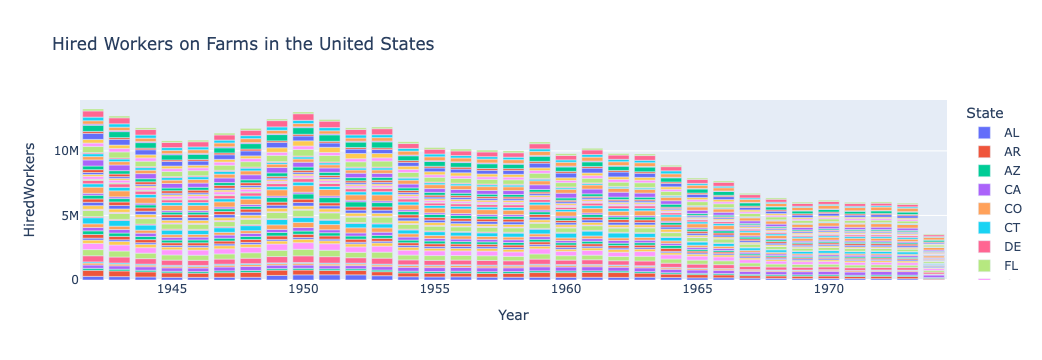

In [80]:
hired_df = farmworkers_df[farmworkers_df['HiredWorkers'].notna()]
hired_year = hired_df.groupby(['State', 'Year'])['HiredWorkers'].mean().reset_index()

import plotly.express as px

hiredfig = px.bar(hired_year, x='Year', y='HiredWorkers', color='State', title="Hired Workers on Farms in the United States")
hiredfig.show()

The overall trend in the United States shows that, after the 1964 ending of the Bracero Program, the number of hired workers on farms gradually decreased. (Note that you can look at individual state trends by double clicking on the state in the side bar.) A decrease at this time could be connected to the ending of the Bracero Program, as farms were no longer hiring Mexican workers through the program. However, it is important to note that the decrease in hired workers began as early as after the peak in 1950, showing that the decreasing trend, while correlating with the ending of the Bracero Program, may not have been caused by it.

As the Bracero Program was specifically for temporary workers, it is possible that ending the program would have a more drastic impact on seasonally hired fired workers, something explored in the chart below.

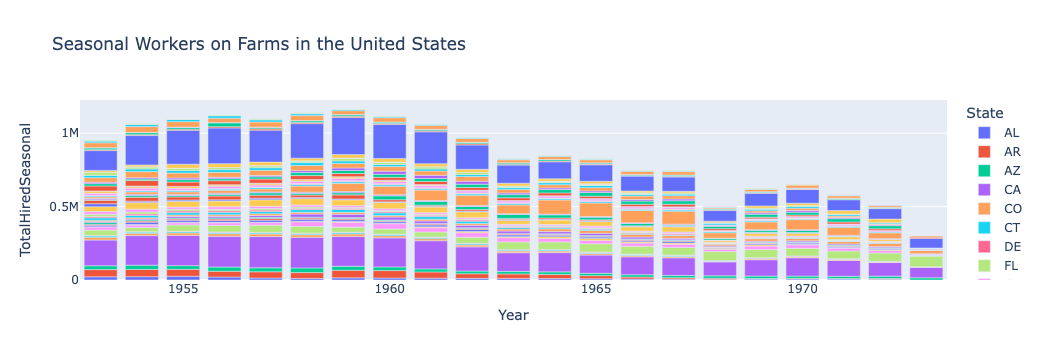

In [86]:
##An extra step because there was a weird outlier of some data in 1948 despite the data being only from 1953-1973
seasonal_year = seasonal_year[seasonal_year['Year'] > 1948]

seasonalfig = px.bar(seasonal_year, x='Year', y='TotalHiredSeasonal', color='State', title='Seasonal Workers on Farms in the United States')
seasonalfig.show()

Like the hired workers category, the number of seasonal workers on farms did slightly drop immediately after the ending of the Bracero Program in 1964, but the drop was not significant until later in the decade. Similarly, the number of seasonal workers began dropping before the end of the program in around 1960.

This drop before the end of the Bracero Program can even be seen in the numbers of contracted Bracero Workers. Like with seasonal workers, the decline in Bracero workers started declining in around 1960, showing that it is likely that the decline in seasonal workers was partly due to a decline in Bracero workers. 

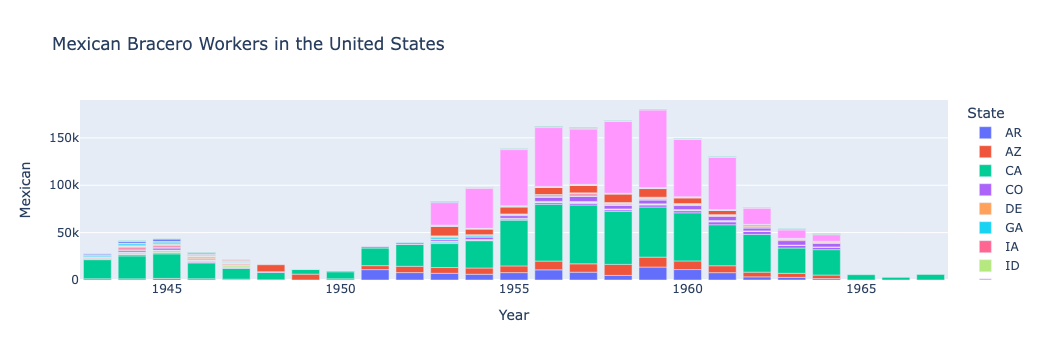

In [100]:
mexican_df = farmworkers_df[farmworkers_df['Mexican'].notna()]
mexican_df = farmworkers_df[farmworkers_df['Mexican'] > 0.0]
mexican_total = mexican_df.groupby(['State', 'Year'])['Mexican'].mean().reset_index()

bracerofig = px.bar(mexican_total, x='Year', y='Mexican', color='State', title='Mexican Bracero Workers in the United States')
bracerofig.show()

There are many potential explanations for this decline happening before the end of the Bracero Program. For instance, farm owners may have already been trying to prepare for the eventual end of the Bracero Program before 1964, as sentiment in the public and the government by 1960 indicated that the program would not last forever. Braceros themselves may have even stopped participating in the program, as mistreatment and discriminatino were common towards Braceros. It is also possible that the decline occurred independently from the Bracero Program, with farm owners needing less work due to technological innovations. That said, the idea of technological innovations occurring earlier than the end of the Bracero Program contradicts the analysis by San Shmuel in 2021, who concluded that technological innovations spiked as a response to a scarcity in workers. Either way, drastic declines in farmworkers started before the intentional attempt to create labor scarcity through ending the Bracero Program.

This, however, still does not address whether ending the Bracero Program benefited domestic workers. It is possible, for instance, that even with a decline in hired and seasonal workers, farm owners still hired more domestic workers to account for a more drastic decrease in Bracero workers. However, the following analysis shows this not to be the case.

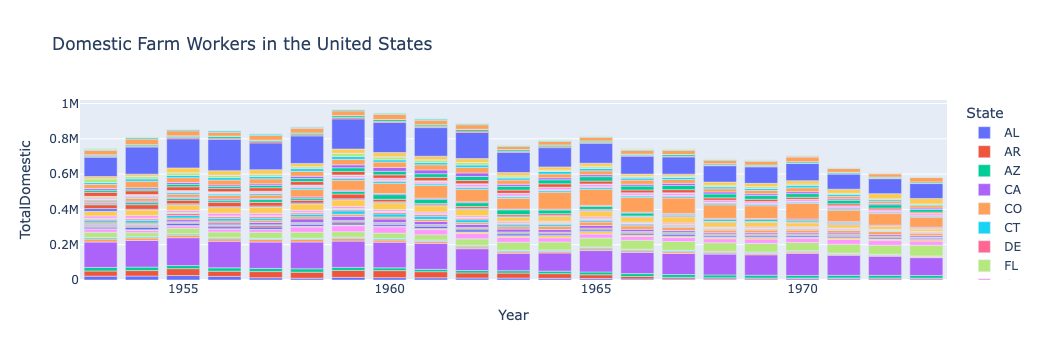

In [165]:
##Only use relevant date ranges
domestic_df = farmworkers_df[farmworkers_df['Year'] >= 1953]
domestic_df = domestic_df[domestic_df['Year'] <= 1973]

## In the data, there were 3 categories of workers that represented domestic labor: Local, Interstate, and Intrastate.
domestic_df = domestic_df.groupby(['State', 'Year'])[['Local', 'Interstate', 'Intrastate']].mean().reset_index()

##These three categories can be combined for the total domestic farmworkers
domestic_df['TotalDomestic'] = domestic_df['Local']+domestic_df['Interstate']+domestic_df['Intrastate']

domesticfig = px.bar(domestic_df, x='Year', y='TotalDomestic', color='State', title='Domestic Farm Workers in the United States')
domesticfig.show()

In this analysis, the decline in domestic farmworkers follows a similar pattern to the other categories, beginning a gradual decline around 1960. However, after 1965 the number of domestic farmers in the United States remains relatively stable compared to the gradual declines that continued for hired and seasonal workers. This may indicate that ending the Bracero Program helped domestic workers not feel as much of the impact of the overall decline in farmworkers due to changed technologies and practices.

### Unauthorized Mexican Immigration

The analysis of the previous data does not take into account unauthorized Mexican immigration. Scholars generally agree that the Bracero Program, while providing a legal way for Mexicans to work, simultaneously increased the number of unauthorized Mexican immigrants working in the United States. This system flourished because it was often easier for both the Mexican workers and farm owners, as Mexican workers did not have to go through the tedious process of screening and documentation (that often required bribes) and farm owners  did not have to provide the required housing, food, and transportation for workers not under Bracero contracts. This in turn created a pathway for unauthorized immigration that continued long after ending the Bracero Program in 1964.

As mentioned before, evidence for this increase in unauthorized Mexican immigration has been connected to the number of official apprehensions of these unauthorized immigrants.

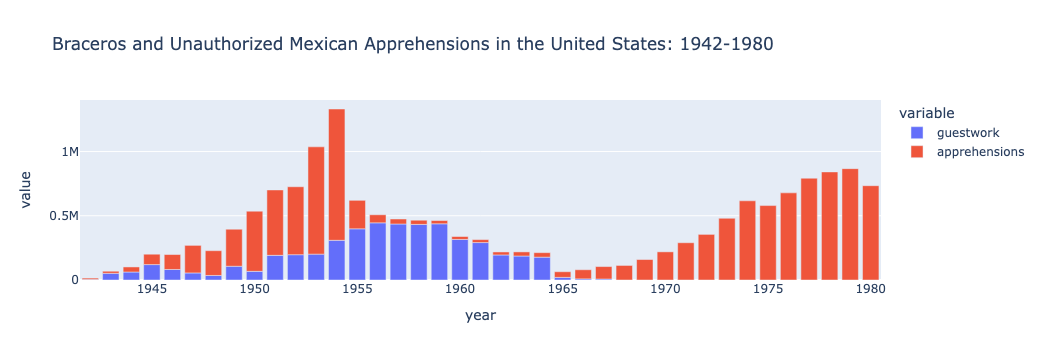

In [147]:
apprehension_df = pd.read_csv('../data/original/total_braceros_by_year.tab', sep='\t')

apprehensionfig = px.bar(apprehension_df, x='year', y=['guestwork','apprehensions'], title='Braceros and Unauthorized Mexican Apprehensions in the United States: 1942-1980')
apprehensionfig.show()

Considering apprehensions as indicative of the number of unauthorized Mexican immigrants in the United States, one could interpret a drastic increase in unauthorized Mexican immigration associated with the development of the Bracero Program and the number of unauthorized immigrants increasing after the end of the Bracero Program. However, changes in apprehension data is more indicative of the changes in effort the United States government was putting into seizing unauthorized immigrants, rather than the changes in the numbers of unauthorized immigrants. Yes, more unauthorized immigrants would provide more opportunities for them to be apprehended, but such data should be looked at cautiously. For instance, the drastic spike in apprehensions in the early 1950s corresponds with increasing public and government concern in the United States regarding unauthorized immigrantion from Mexico. This concern resulted in more resources put towards apprehensions, culminating in "Operation Wetback" in 1954 as a largescale deportation effort. 

This shows the particular difficulty in measuring unauthorized immigration, as unauthorized immigrants would not willingly reveal themselves to be counted as unauthorized as this would likely result in their deportation. In the same vein, this would not be included in the statistics for the United States Department of Agriculture without the government working to take action against specific farms to remedy the unlawful practices. Therefore, there is no way to truly know the number of unauthorized Mexican immigrants working on farms during this time period. 

Similarly, using numbers, one cannot determine the extent to which farm owners replaced Bracero workers with unauthorized immigrants at the end of the Bracero Program. The minimal benefits for domestic workers in ending the Bracero Program therefore could be explained by the possibility that farm owners replaced Bracero workers with unauthorized immigrants instead of domestic workers. In this sense, there is also the possibility that the decline in farmworkers shown in the data connects to reluctance of farm owners to accurately report their unauthorized workers when reporting data. Therefore, while innovations in agricultural technology undoubtedly caused shifts in farming, the variable of unauthorized Mexican immigrants and lack of clarity surrounding its counting makes conclusions more difficult to determine.

### Further Data Caveats

It is important to note further inconsistencies in the data that may impact the reading of these visualizations. As mentioned earlier, there was a wide variety in the consistency of data reporting for each state. This is most easily visualized through the data regarding Braceros working in Texas.

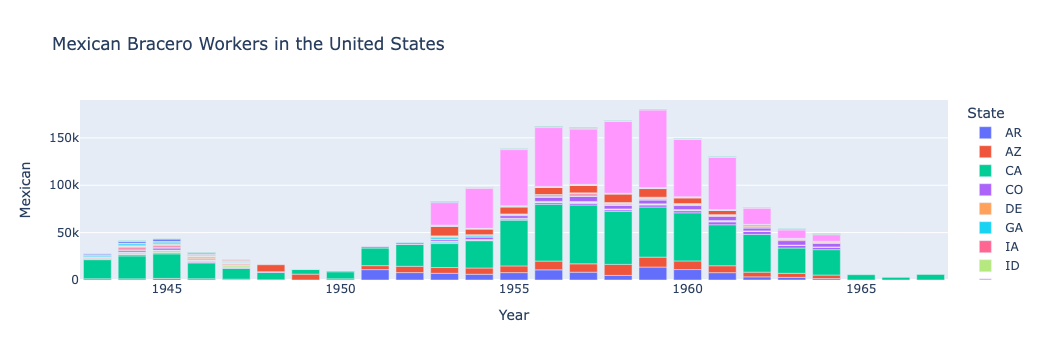

In [155]:
bracerofig.show()

As one can tell from the pink bars, Texas often had the most Bracero workers of any state, its numbers only in competition with those in California. However, there is no data for the Bracero workers in Texas until 1953, likely making the early parts of the graph skewed to show fewer Bracero workers. While Mexico actually insisted on excluding Texas from the Bracero program until 1947 because of Texans' particularly racist attitudes and actions towards Mexicans, this does not account for the lack of data from 1947 until 1953. (In Texas' initial years of exclusion from the program, they also relied on unauthorized immigrants to work on farms, something not shown in the data.)

While the reported data for the Bracero workers showed the most inconsistencies, with the other data categories, there are many states that do not have data for all of the years shown. For instance, with the domestic data, there are years where West Virginia (and likely others) do not have any data whatsoever. This indicates potential inconsistencies in reporting, something that not only skews the final data and appearance of graphs but also brings up questions regarding the validity of the numbers that *were* collected.

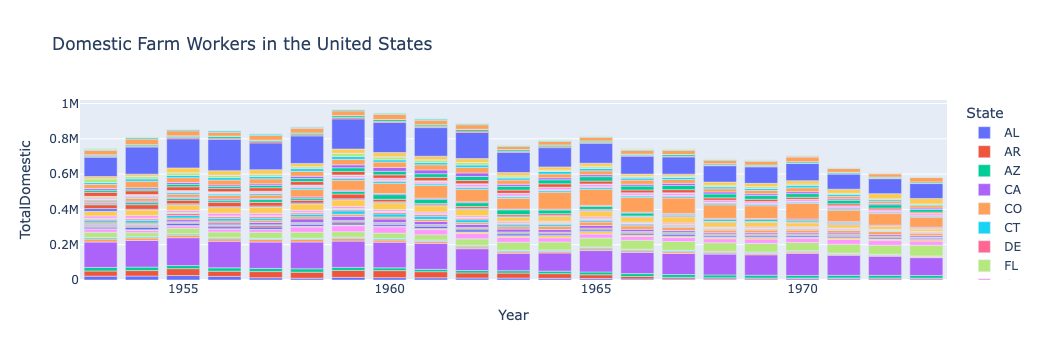

In [170]:
domesticfig.show()

## Conclusion

While those ending the Bracero Program expressed goals to benefit the domestic workforce, this data shows little, if any, increase in the domestic workforce at the end of the program. In fact, an overall decline in farmworkers because in the years before ending the Bracero program, indicating other factors at play impacting farmworkers outside of the Bracero Program. Whether this is explained through technological innovations, unauthorized immigration, or other unrelated factors, this reveals the multifaceted nature of something like a labor force. While the United States government attempted to influence domestic labor through ending the Bracero Program, the number of influences on this industry meant they could not isolate changes to any single cause. 

As this project revealed the complexity in factors surrounding changes in labor forces, it also reveals the limitations of working with data to tell such stories. While one can use the data to notice trends in certain statistics, there is no way to determine causes or effects of these trends without looking into further contexts to help explain them. Similarly, such data reduces the story of the Bracero Program to numbers without exploring the impact the program had on people and their lives. Much of the scholarship concerning the Bracero Program does focus on these more human stories, particularly emphasizing mistreatment and discrimination against Braceros throughout the program. Emphasizing the data and numbers connected to the story leaves out an essential piece of the history, and although it is well documented, it should not be ignored.

## Github Repository

## Bibliography